In [ ]:
pip install pandas matplotlib seaborn scikit-learn

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("spotify.csv")

In [64]:
df.sample().T

,1255
track_id,2ekn2ttSfGqwhhate0LSR0
track_name,New Rules
track_artist,Dua Lipa
track_popularity,83
track_album_id,01sfgrNbnnPUEyz6GZYlt9
track_album_name,Dua Lipa (Deluxe)
track_album_release_date,2017-06-02
playlist_name,Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s
playlist_id,4QAzO1Z92yqqD6Mf3mOANu
playlist_genre,pop


In [65]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [66]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [79]:
X = df[ ['danceability','instrumentalness','tempo']]

In [80]:
from sklearn.cluster import KMeans 

tata = KMeans(n_clusters=10)
tata.fit(X)

KMeans(n_clusters=10)

In [81]:
tata.labels_

array([5, 0, 2, ..., 2, 2, 2])

In [82]:
df['cluster'] = tata.labels_

<Axes: xlabel='danceability', ylabel='track_popularity'>

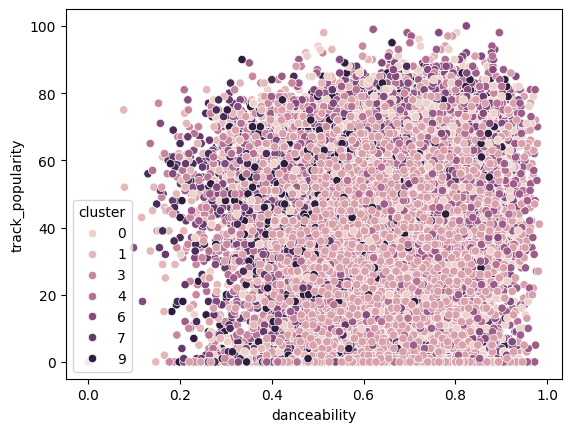

In [86]:
import seaborn as sns

sns.scatterplot(df, x='danceability', y='track_popularity', hue="cluster")

In [129]:
df[ df['cluster']== 8].sample(7)[ ['track_name', 'track_artist', 'danceability', 'tempo']]

,track_name,track_artist,danceability,tempo
25389,Tungba,Ajebutter22,0.749,203.776
21298,Si Tú,Justin Quiles,0.653,187.764
8749,Party Up,DMX,0.510,201.936
21828,Peaches and Cream,112,0.677,203.862
23874,The Greatest,Sia,0.666,192.024
24722,Peaches & Cream (feat. P. Diddy),112,0.706,203.746
16044,The Rover - 1993 Remaster,Led Zeppelin,0.367,205.470


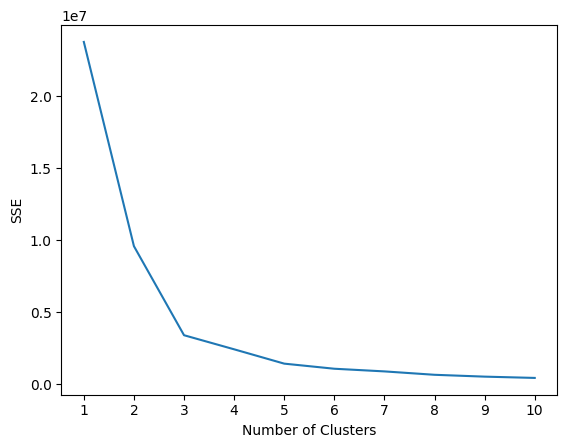

In [124]:
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Visualize the results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()